In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [23]:

from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
apple = pd.read_csv('AAPL.csv')


# Tarih sütununu datetime formatına dönüştürün
apple['Date'] = pd.to_datetime(apple['Date'])

# 2022 yılına ait verileri filtreleyin
apple = apple[apple['Date'].dt.year > 2012]





In [7]:
#  Check out the type of the columns
apple.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [8]:
# Transform the Date column as a datetime type
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

,Date
7835,2012-01-03
7836,2012-01-04
7837,2012-01-05
7838,2012-01-06
7839,2012-01-09


In [24]:
# Set the date as the index
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.914257,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.700762,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.235569,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.140064,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.183504,458707200


In [17]:
#  Is there any duplicate dates?
apple.index.is_unique

True

In [10]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557464,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624949,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765109,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878093,394024400


In [11]:
# Get the last business day of each month
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,15.312857,15.393161,15.207518,15.306357,13.087210,3.429927e+08
2012-02-29,17.671536,17.887464,17.551339,17.770393,15.194004,5.684277e+08
2012-03-30,20.602078,20.788019,20.365925,20.625276,17.634980,7.083790e+08
2012-04-30,21.771696,21.981697,21.380357,21.642964,18.505122,7.799495e+08
2012-05-31,20.206607,20.433620,19.942760,20.166899,17.243061,5.048339e+08


In [12]:
# How many months in the data we have?
apple_months = apple.resample('BM').mean()

len(apple_months.index)

12

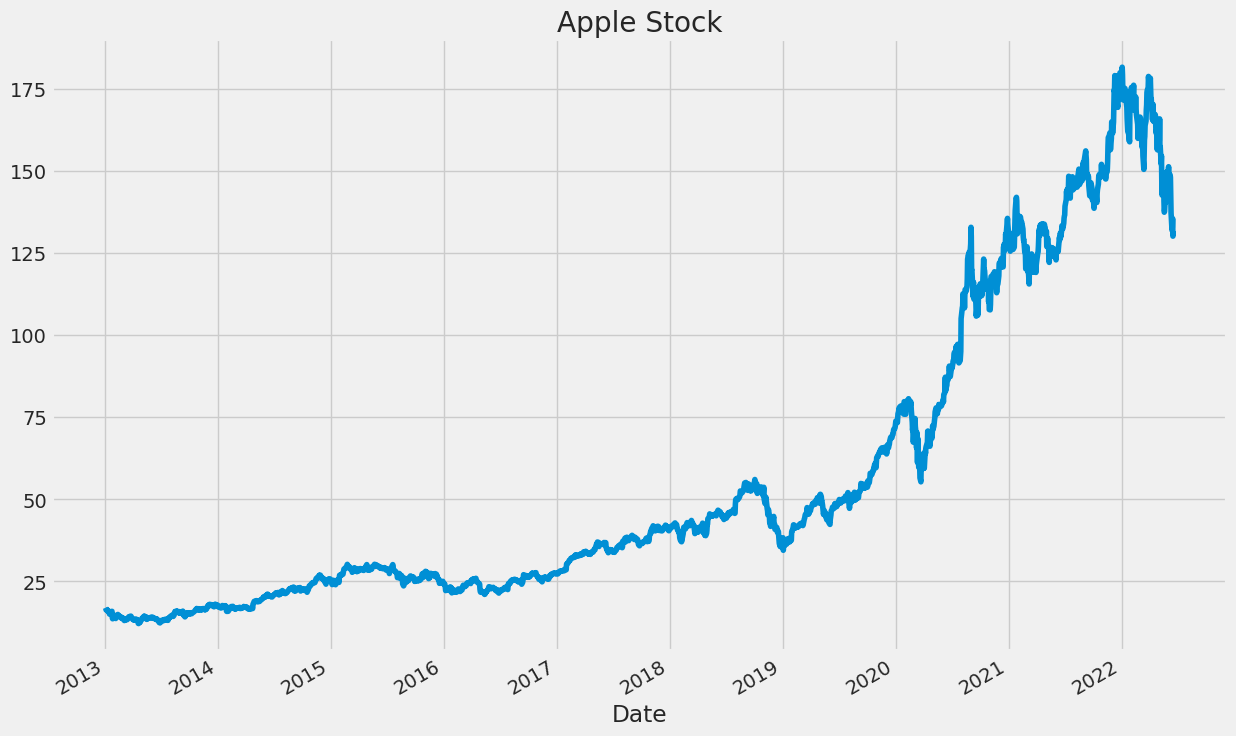

In [25]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

Text(0.5, 1.0, 'Correlation of stock closing price')

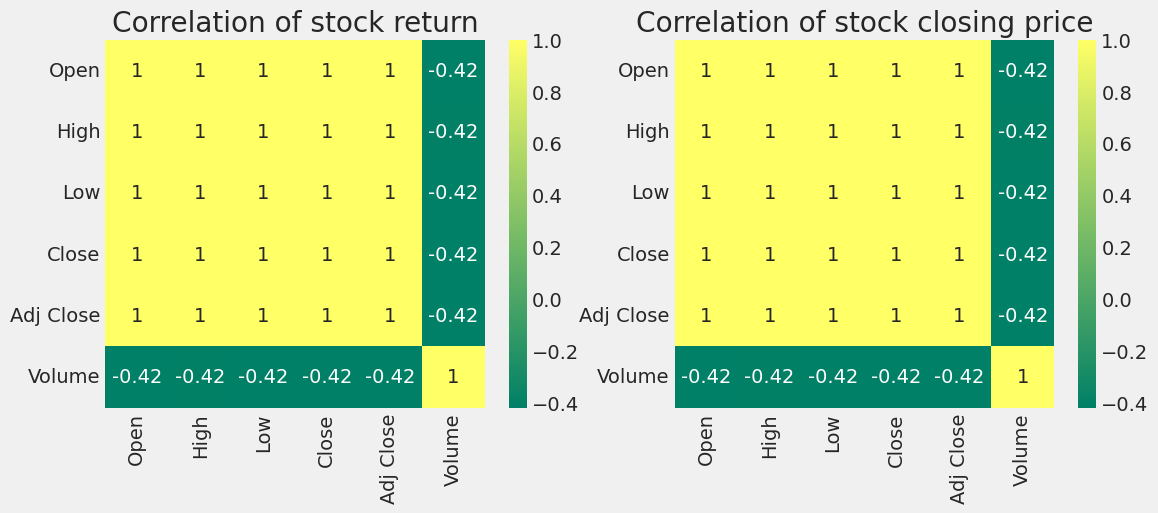

In [26]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(apple.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(apple.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

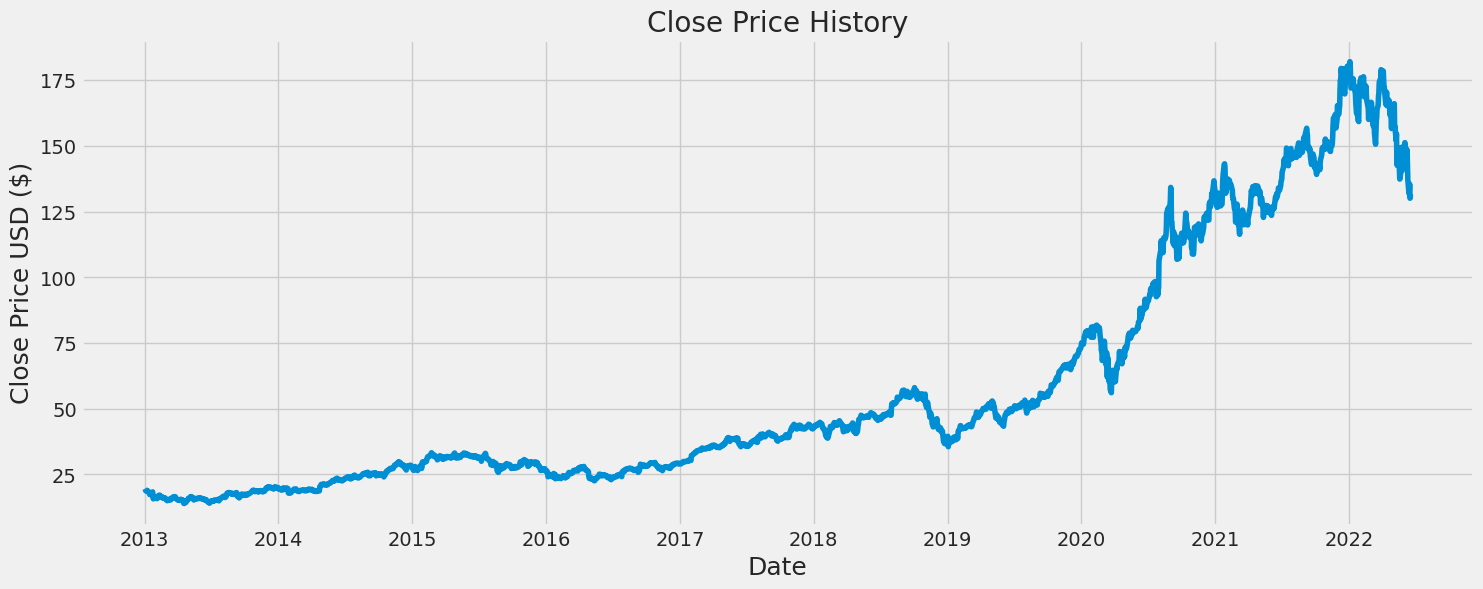

In [27]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(apple['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
# Create a new dataframe with only the 'Close column
data = apple.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2264

In [29]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03368219],
       [0.03220953],
       [0.02900069],
       ...,
       [0.72284118],
       [0.69088881],
       [0.69981407]])

In [30]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.02326303, 0.02427668, 0.02624024,
       0.01274399, 0.01048717, 0.0126016 , 0.01439515, 0.01408915,
       0.01380439, 0.013407  , 0.01100569, 0.01430378, 0.01419965,
       0.01650959, 0.01794613, 0.01899803, 0.01644159, 0.01625245,
       0.01616321, 0.01479679, 0.01476066, 0.01239335, 0.01180046,
       0.01280986, 0.01110769, 0.01241885, 0.01148382, 0.01081018,
       0.00848749, 0.00627318, 0.00862987, 0.00746534, 0.00851086,
       0.00875312, 0.01006003, 0.00805397, 0.00803697, 0.00891888,
       0.01129044, 0.01385327, 0.01359189, 0.01307974, 0.01321787,
       0.01516868, 0.01552356, 0.01500505, 0.01307974, 0.01107794])]
[0.008155977929519595]

[array([0.03368219, 0.03220953, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02363492, 0.02027095,
       0.02455719, 0.02383254, 0.0

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2204/2204 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - loss: 0.0032


In [32]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


5.672173946136085

<ipython-input-33-671f446f3d7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


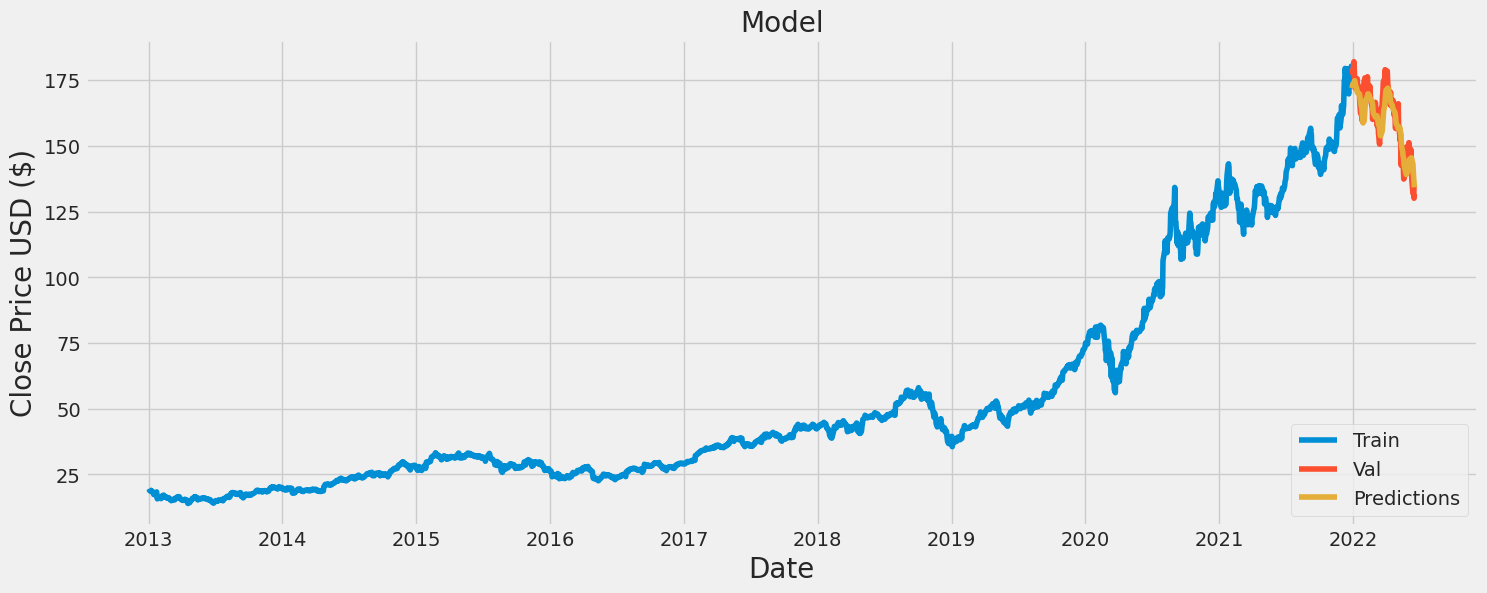

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2012-12-13,18.917500,19.847694
2012-12-14,18.206785,19.733221
2012-12-17,18.529642,19.588181
2012-12-18,19.067858,19.452948
2012-12-19,18.796785,19.361364
2012-12-20,18.633215,19.287422
2012-12-21,18.547501,19.221003
2012-12-24,18.577499,19.159418
2012-12-26,18.321428,19.106804
